<a href="https://colab.research.google.com/github/madhusrigarlapati/APPL_FINAL_PROJECT/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***FINAL Project***



## ***PROJECT ON CREDIT CARD HOLDERS***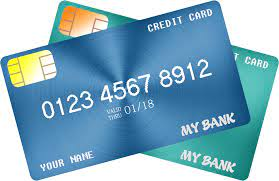






## ***AIM : To predict the use of credit card***

##  ***1. Import Libraries***

In [ ]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.model_selection import train_test_split
import sklearn.model_selection as model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors, metrics


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# ***# EDA (EXPLORATORY DATA ANALYSIS)***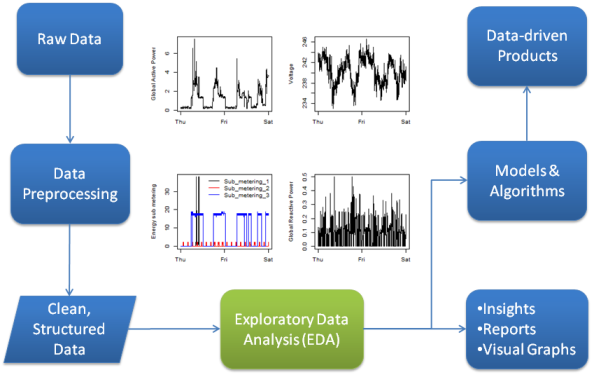

## Load The Dataset  

In [ ]:
data=pd.read_csv("BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## ***To know the shape of dataset***

In [ ]:
data.shape

(10127, 23)

## ***To know the information of dataset***

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           


## ***Describe Method***


In [ ]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


## ***To Know The Values Are Null Or Not***

In [ ]:
data.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

##   ***To replace anything in columns***


In [ ]:
data['Card_Category'].replace(to_replace ="Blue",value ="Black")

0         Black
1         Black
2         Black
3         Black
4         Black
          ...  
10122     Black
10123     Black
10124     Black
10125     Black
10126    Silver
Name: Card_Category, Length: 10127, dtype: object

## ***To know how many number of rows and columns***

In [ ]:
data.shape

(10127, 23)

In [ ]:
features=['Customer_Age','Credit_Limit','Total_Revolving_Bal','Total_Trans_Amt']

In [ ]:
X=data[features]

In [ ]:
X.head()

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt
0,45,12691.0,777,1144
1,49,8256.0,864,1291
2,51,3418.0,0,1887
3,40,3313.0,2517,1171
4,40,4716.0,0,816


In [ ]:
y=data.Avg_Utilization_Ratio
y.head()

0    0.061
1    0.105
2    0.000
3    0.760
4    0.000
Name: Avg_Utilization_Ratio, dtype: float64

In [ ]:
y.shape

(10127,)

## ***Spilt the data***

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,train_size=0.90,test_size=0.10,random_state=2)
print("X_train\n",X_train)
print("X_test\n",X_test)
print("Y_train\n",Y_train)
print("Y_test\n",Y_test)

X_train
       Customer_Age  Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt
2693            61        7118.0                  813             3964
7322            35        1613.0                 1085             5000
1031            45        2259.0                  954             1393
6808            37        1976.0                    0             4424
6930            51        1844.0                 1232             4182
...            ...           ...                  ...              ...
1099            48       19762.0                  507             2793
2514            47        5762.0                 1890             3814
6637            42        2899.0                 1952             4906
2575            47       34516.0                  802             1823
7336            58        1817.0                    0             2347

[9114 rows x 4 columns]
X_test
       Customer_Age  Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt
7862            42        4162.0   

In [ ]:
for col in cat_col:
    print('{} has {} values '.format(col,data[col].unique()))
    print('\n')

Attrition_Flag has ['Existing Customer' 'Attrited Customer'] values 


Gender has ['M' 'F'] values 


Education_Level has ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate'] values 


Marital_Status has ['Married' 'Single' 'Unknown' 'Divorced'] values 


Income_Category has ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown'] values 


Card_Category has ['Blue' 'Gold' 'Silver' 'Platinum'] values 




## ***Data Cleaning*** 

In [ ]:
data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1,inplace=True)

In [ ]:
data.head()

In [ ]:
def convert_dtype(data,i):
    data[i] = pd.to_numeric(data[i], errors='coerce')

In [ ]:
for i in X:
    convert_dtype(data,i)

In [ ]:
def extract_cat_num(data):
    cat_col=[col for col in data.columns if data[col].dtype=='object']
    num_col=[col for col in data.columns if data[col].dtype!='object']
    return cat_col,num_col

In [ ]:
cat_col,num_col=extract_cat_num(data)

In [ ]:
cat_col

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [ ]:
num_col

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']

In [ ]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710


In [ ]:
len(num_col)

16

## ***Hist plots***

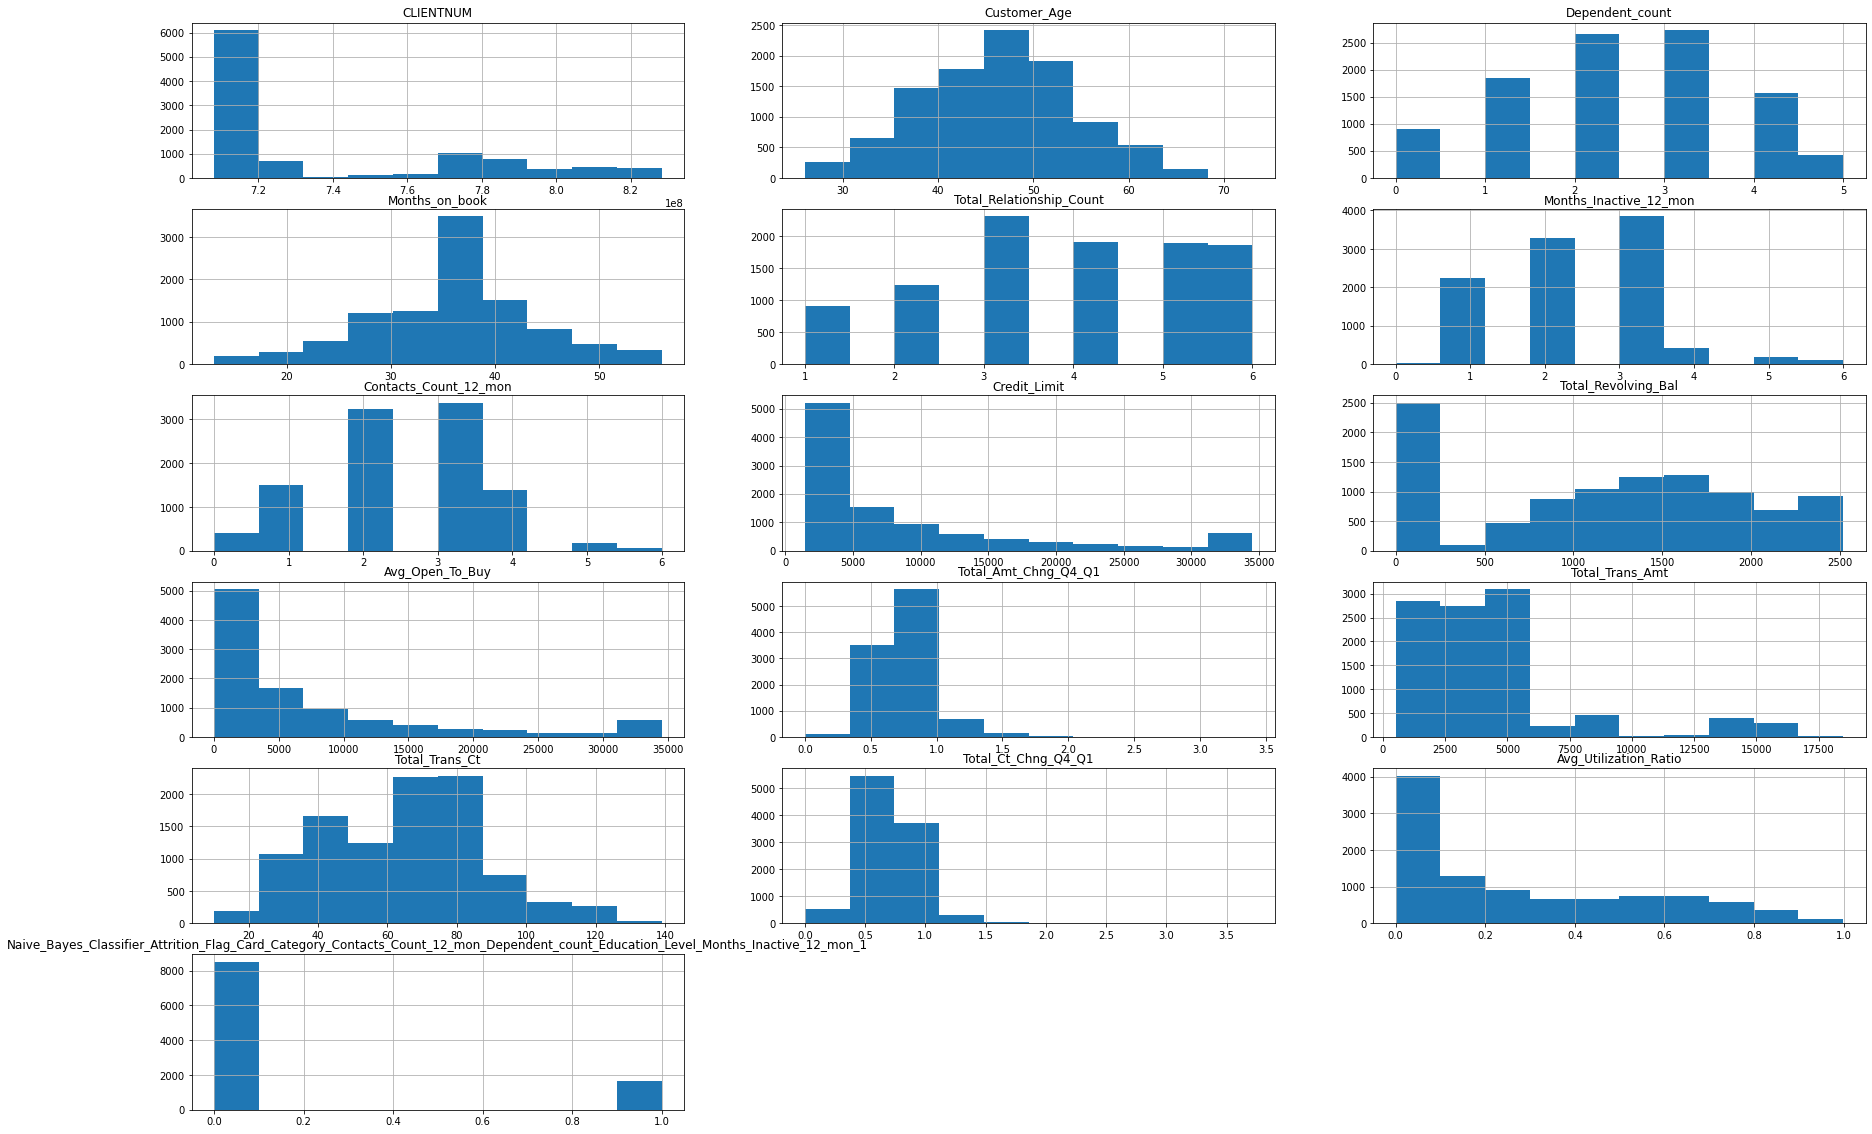

In [ ]:
plt.figure(figsize=(30,20))
for i,X in enumerate(num_col):
    plt.subplot(6,3,i+1)
    data[X].hist()
    plt.title(X)

In [ ]:
len(cat_col)

6

## ***Count Plot***

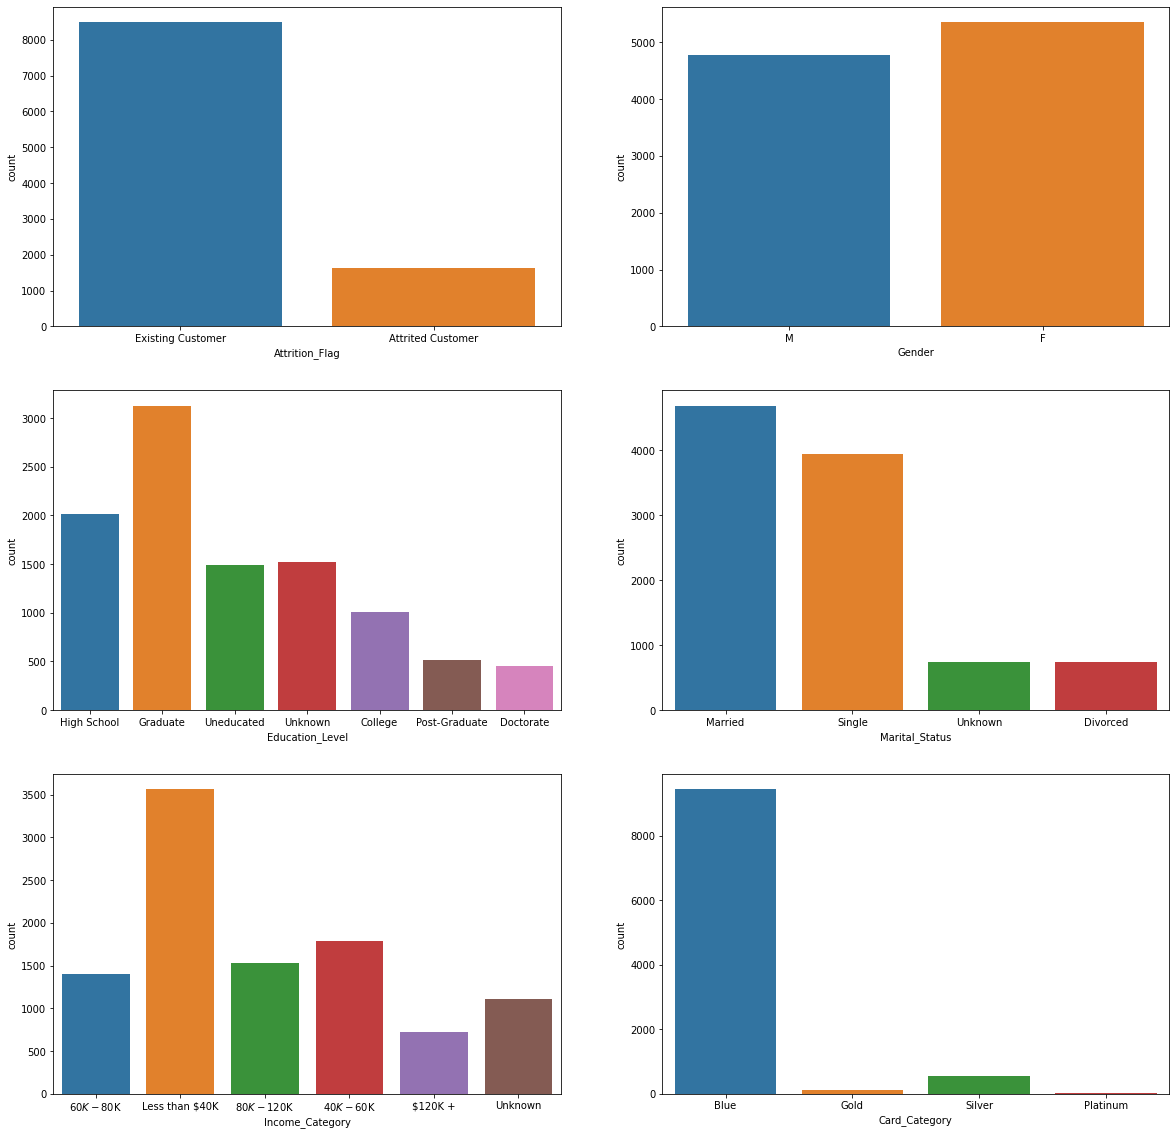

In [ ]:
plt.figure(figsize=(20,20))
for i,X in enumerate(cat_col):
    plt.subplot(3,2,i+1)
    sns.countplot(data[X])

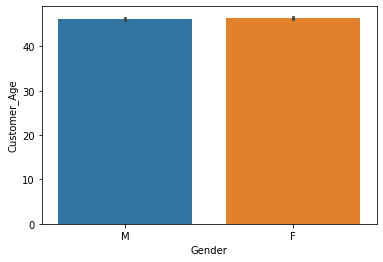

In [ ]:
sns.barplot(data=data,x="Gender",y="Customer_Age")

## ***Facetgrid Plot*** 

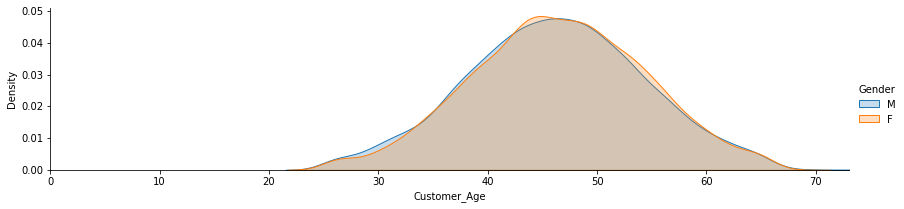

In [ ]:
facet = sns.FacetGrid(data,hue="Gender", aspect=4)
facet.map(sns.kdeplot, 'Customer_Age', shade=True)
facet.set(xlim=(0,data['Customer_Age'].max()))
facet.add_legend()

plt.show()

## ***Heat Map***

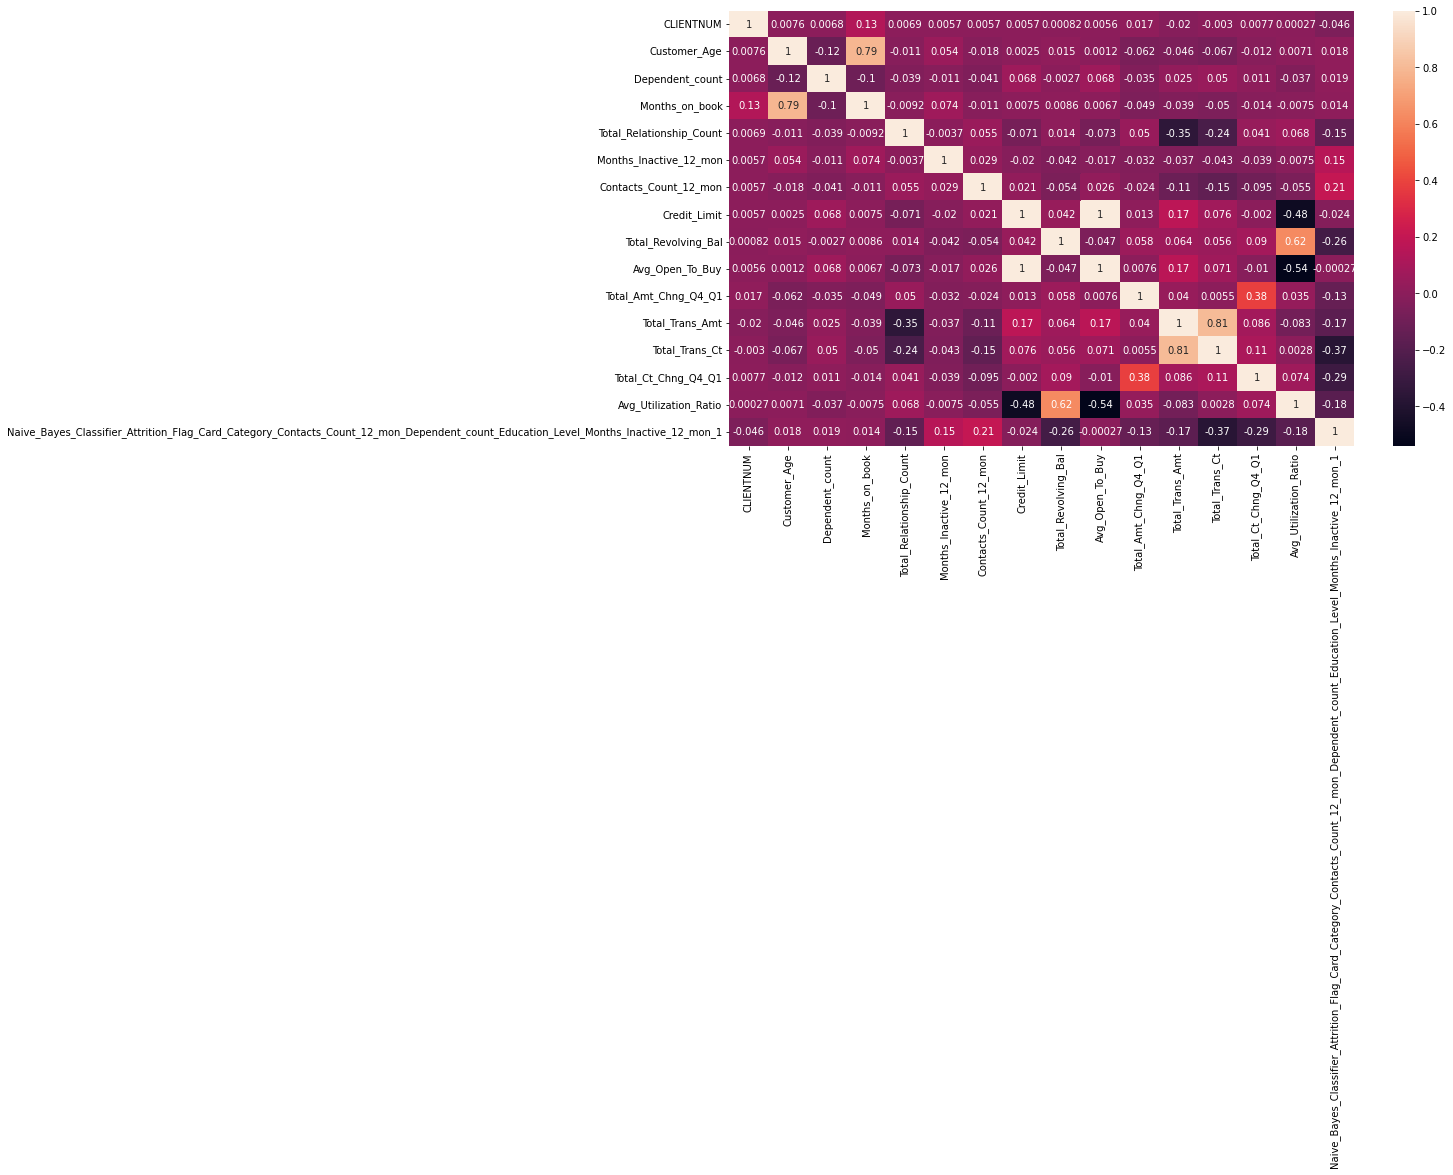

In [ ]:
plt.figure(figsize=(14,8))
corr_data = data.corr()
sns.heatmap(corr_data,annot=True)

### ***Install plotly***

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
def violin(col):
    fig=px.violin(data,y=col,x='class',color='class',box=True)
    return fig.show()

In [ ]:
px.violin(data,x="Gender",y="Customer_Age")

In [ ]:
px.violin(data,x="Education_Level")

# ***MACHINE LEARNING MODELS***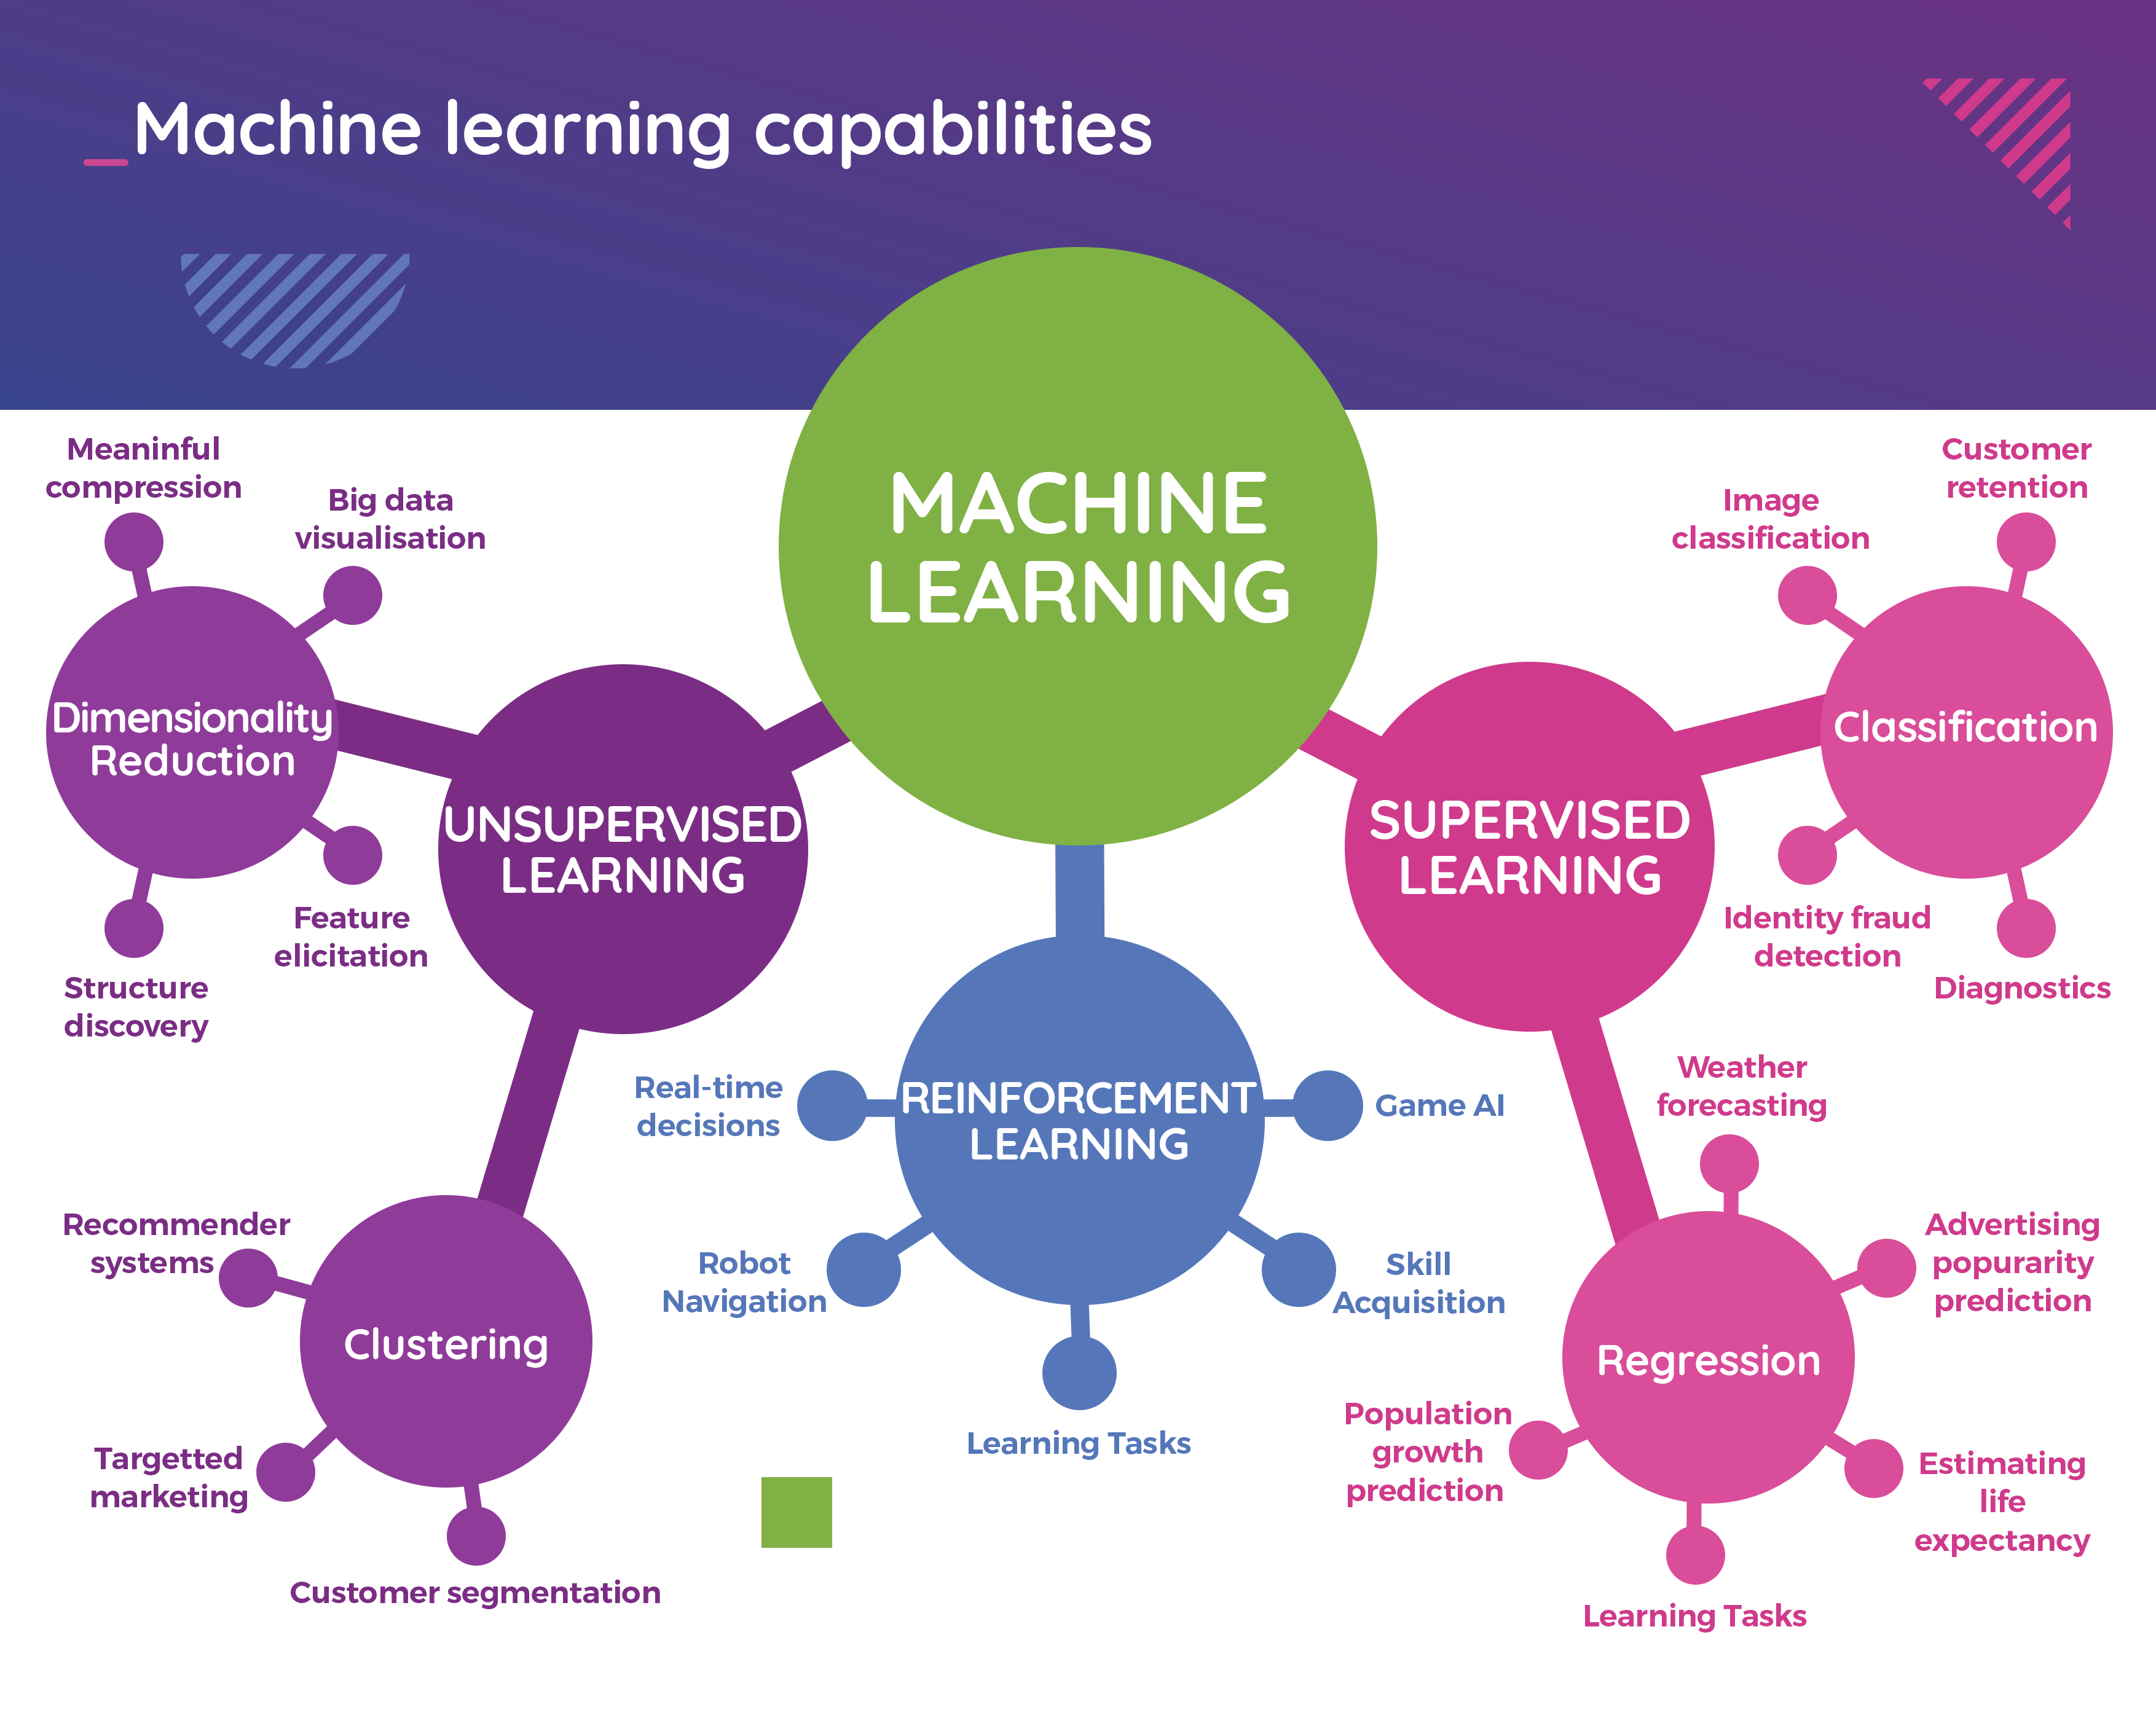

## ***1. Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree= DecisionTreeRegressor(random_state=1)

# Fit model
tree.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

## ***Predict the data***

In [ ]:
print("Making predictions for the following 5 credit card holders:")
print(X_train.head())
print("The predictions are")
print(tree.predict(X_train.head()))

Making predictions for the following 5 credit card holders:
      Customer_Age  Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt
2693            61        7118.0                  813             3964
7322            35        1613.0                 1085             5000
1031            45        2259.0                  954             1393
6808            37        1976.0                    0             4424
6930            51        1844.0                 1232             4182
The predictions are
[0.114 0.673 0.422 0.    0.668]


## ***2. Mean Absolute Error (MAE)***

In [ ]:
prediction = tree.predict(X_train)
mean_absolute_error(Y_train, prediction)

9.874917709022e-07

In [ ]:
test_predictions = tree.predict(X_test)
print(mean_absolute_error(Y_test, test_predictions))

0.005028726554787756


In [ ]:
def get_mae(max_leaf_nodes, X_train, X_test, Y_train, Y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, Y_train)
    preds_val = model.predict(X_test)
    mae = mean_absolute_error(Y_test, preds_val)
    return(mae)

In [ ]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes,X_train, X_test, Y_train, Y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  0
Max leaf nodes: 50  		 Mean Absolute Error:  0
Max leaf nodes: 500  		 Mean Absolute Error:  0
Max leaf nodes: 5000  		 Mean Absolute Error:  0


### ***3. Random Forest***

In [ ]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, Y_train)
melb_preds = forest_model.predict(X_test)
print(mean_absolute_error(Y_test, melb_preds))

0.002114404466130824


#### ***Split the data***

In [ ]:
trainX,testX,trainY,testY=train_test_split(data,y,train_size=0.90,test_size=0.10,random_state=2)
print("X_train\n",trainX)
print("X_test\n",testX)
print("Y_train\n",trainY)
print("Y_test\n",testY)

X_train
       CLIENTNUM  ... Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
2693  822138333  ...                                           0.000766                                                                                
7322  788418933  ...                                           0.000191                                                                                
1031  813915933  ...                                           0.000180                                                                                
6808  816091608  ...                                           0.000175                                                                                
6930  710090958  ...                                           0.000305                                                                                
...         ...  ...                                                ...        

In [ ]:
def dataset(trainX, testX,trainY,testY):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(trainX, trainY)
    preds = model.predict(testX)
    return mean_absolute_error(testY, preds)

In [ ]:
# Shape of training data (num_rows, num_columns)
print(data.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (trainX.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(10127, 22)
Series([], dtype: int64)


In [ ]:
cat_col

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [ ]:
drop_X_train = trainX.select_dtypes(exclude=['object'])
drop_X_valid = testX.select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables):")
print(dataset(drop_X_train, drop_X_valid, trainY, testY))

MAE from Approach 1 (Drop categorical variables):
8.331226837527126e-05


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])

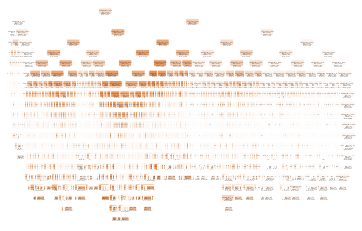

In [ ]:
dec_tree = plot_tree(decision_tree=tree,feature_names=trainX.columns,filled=True,precision=4,rounded=True)

## ***4. k-nearest neighbors (KNN) algorithm***


 ## **FITTING,PREDICTING AND ACCURACY**

In [ ]:
A=data[['Attrition_Flag','Marital_Status','Education_Level']].values
b=data[['Card_Category']]
print(A,b)

[['Existing Customer' 'Married' 'High School']
 ['Existing Customer' 'Single' 'Graduate']
 ['Existing Customer' 'Married' 'Graduate']
 ...
 ['Attrited Customer' 'Married' 'High School']
 ['Attrited Customer' 'Unknown' 'Graduate']
 ['Attrited Customer' 'Married' 'Graduate']]       Card_Category
0              Blue
1              Blue
2              Blue
3              Blue
4              Blue
...             ...
10122          Blue
10123          Blue
10124          Blue
10125          Blue
10126        Silver

[10127 rows x 1 columns]


In [ ]:
#converting data
le= LabelEncoder()
for i in range(len(A[0])):
    A[:,i]=le.fit_transform(A[:,i])
print(A)

[[1 1 3]
 [1 2 2]
 [1 1 2]
 ...
 [0 1 3]
 [0 3 2]
 [0 1 2]]


In [ ]:
label_mapping = {
    'Blue':3,
    'Gold':2,
    'Silver':1,
    'Platinum':0
}
b['Card_Category'] =b['Card_Category'].map(label_mapping)
b=np.array(b)
print(b)

[[3]
 [3]
 [3]
 ...
 [3]
 [3]
 [1]]


In [ ]:
#create model
knn = neighbors.KNeighborsClassifier(n_neighbors=25,weights='uniform')
A_train,A_test,B_train,B_test=train_test_split(A,b,test_size=0.2)
knn.fit(A_train,B_train)
prediction =knn.predict(A_test)

print(prediction)


[3 3 3 ... 3 3 3]


In [ ]:
accuracy = metrics.accuracy_score(B_test,prediction)
print(accuracy)

0.9348469891411648


In [ ]:
from sklearn.model_selection import learning_curve, validation_curve
def plotLearningCurves(A_train, B_train, classifier, title):
    train_sizes, train_scores, test_scores = learning_curve(
            classifier, A_train, B_train, cv=5, scoring="accuracy")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b" ,label="Training Error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r" ,label="Cross Validation Error")
    
    plt.legend()
    plt.grid()
    plt.title(title, fontsize = 18, y = 1.03)
    plt.xlabel('Data Size', fontsize = 14)
    plt.ylabel('Error', fontsize = 14)
    plt.tight_layout()

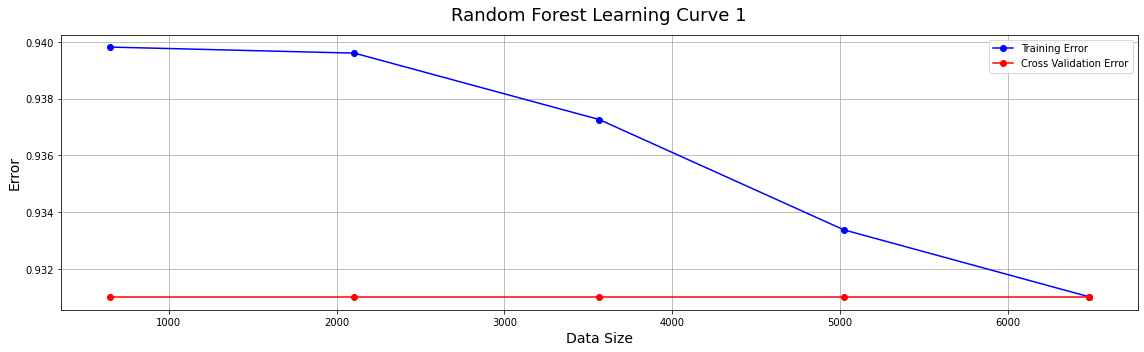

In [ ]:
plt.figure(figsize=(16,5))
title = 'Random Forest Learning Curve 1'
plotLearningCurves(A_train,B_train,knn,title)

### ***5. k-maps***

## FITTING,PREDICTING

In [ ]:
import statsmodels.api as sm
sns.set()
from sklearn.cluster import KMeans

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_train)
pd.DataFrame(data_scaled).describe()

,0,1,2,3
count,9.114000e+03,9.114000e+03,9.114000e+03,9.114000e+03
mean,-6.921535e-17,-1.359457e-17,7.001933e-17,-1.642677e-16
std,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00
min,-2.532265e+00,-7.874938e-01,-1.413198e+00,-1.148855e+00
25%,-6.581734e-01,-6.663763e-01,-1.142451e+00,-6.613835e-01
50%,-3.347620e-02,-4.504602e-01,1.360255e-01,-1.462510e-01
75%,7.161604e-01,2.606944e-01,7.699101e-01,1.022552e-01
max,3.339888e+00,2.848967e+00,1.666894e+00,4.168585e+00


In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans = KMeans(n_jobs= -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
print(pred)

[0 1 4 ... 1 3 4]


# ***Result :***




 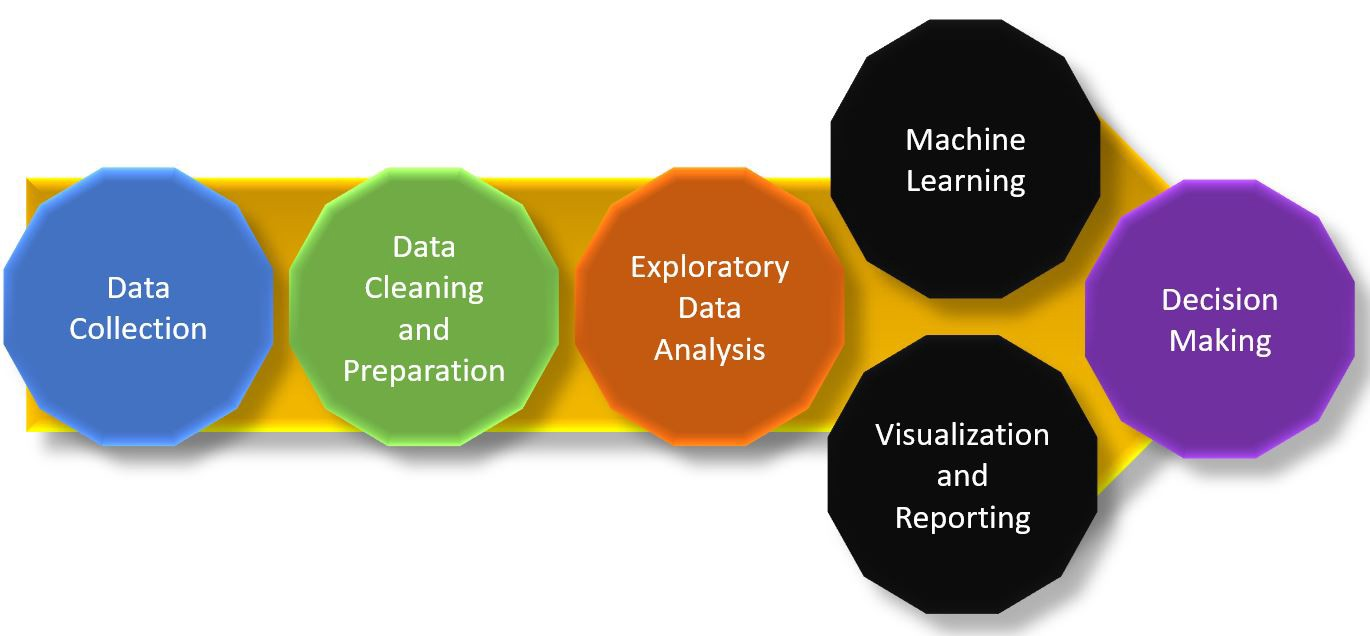




 By using these methods we can predict the average utilisation of credit card users.To achive this I used **Numpy,Pandas,Matplotlib,Seaborn,sklearn** and other libraries in python.This will help to known about how customers usage of credit card and it becomes easy analyse the data. 
 
 In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis was promoted by John Tukey to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. There are 3 steps in EDA means EXPLORATORY DATA ANALYSIS.
### **1)Data sourcing** - load the data set
### **2)Data cleaning** - remove the unneccesary columns in dataset 
### **3)Data visualization** - visuvalise the data 

Data Visualization have an artistic side that makes it beautiful and compelling, at the same time it has a math/scientific side that helps deliver the right insights making the visualization both Engaging and Informative


Split the data. Train/Test split works well with large datasets.The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model. It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. 

MACHINE LEARNING MODELS *Machine learning (ML) is a type of artificial intelligence (AI) that allows software applications to become more accurate at predicting outcomes without being explicitly programmed to do so. Machine learning algorithms use historical data as input to predict new output values. DECISION TREE: A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning.

 K-NEAREST NEIGHBOUR: K-Nearest Neighbors, or KNN for short, is one of the simplest machine learning algorithms and is used in a wide array of institutions. KNN is a non-parametric, lazy learning algorithm. When we say a technique is non-parametric, it means that it does not make any assumptions about the underlying data. In other words, it makes its selection based off of the proximity to other data points regardless of what feature the numerical values represent. Being a lazy learning algorithm implies that there is little to no training phase. Therefore, we can immediately classify new data points as they present themselves. 
 
 K-MEANS: Kmeans Algorithm is an Iterative algorithm that divides a group of n datasets into k subgroups /clusters based on the similarity and their mean distance from the centroid of that particular subgroup/ formed. K, here is the pre-defined number of clusters to be formed by the Algorithm. If K=3, It means the number of clusters to be formed from the dataset is 3